In [57]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from urllib import urlretrieve
import cPickle as pickle
import os
import gzip
import numpy as np
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [58]:
def load_dataset():
    #url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    filename = 'mnist.pkl.gz'
    #if not os.path.exists(filename):
        #print("Downloading MNIST dataset...")
        #urlretrieve(url, filename)

    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)

    X_train, y_train = data[0]
    X_val, y_val = data[1]
    X_test, y_test = data[2]

    X_train = X_train.reshape((-1, 1, 28, 28))
    X_val = X_val.reshape((-1, 1, 28, 28))
    X_test = X_test.reshape((-1, 1, 28, 28))

    y_train = y_train.astype(np.uint8)
    y_val = y_val.astype(np.uint8)
    y_test = y_test.astype(np.uint8)

    return X_train, y_train, X_val, y_val, X_test, y_test

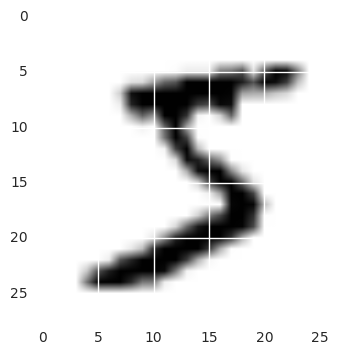

In [59]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
plt.imshow(X_train[0][0], cmap=cm.binary)

In [49]:
X_train[0][0].shape

(28, 28)

In [41]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=20,
    verbose=1,
    )

# Train the network
nn = net1.fit(X_train, y_train)

# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   32x24x24
  2  maxpool1  32x12x12
  3  conv2d2   32x8x8
  4  maxpool2  32x4x4
  5  dropout1  32x4x4
  6  dense     256
  7  dropout2  256
  8  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     0.80868     0.16035    5.04335      0.95502  3.65s
      2     0.25838     0.10674    2.42076      0.96742  3.52s
      3     0.18690     0.08346    2.23949      0.97501  3.44s
      4     0.15517     0.06841    2.26814      0.97961  3.70s
      5     0.13445     0.06172    2.17842      0.98131  3.68s
      6     0.12000     0.05642    2.12678      0.98311  3.83s
      7     0.10874     0.05535    1.96470      0.98401  3.44s
      8     0.09943     0.05130    1.93825      0.98481  3.43s
      9     0.09688     0.04933    1.96384      0.98491  3.44

In [42]:
preds = net1.predict(X_test)

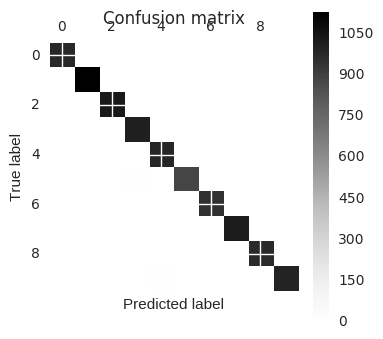

In [43]:
cm = confusion_matrix(y_test, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
from pandas_ml import ConfusionMatrix

In [45]:
cm2 = ConfusionMatrix(y_test,preds)

In [46]:
cm2.print_stats()

Confusion Matrix:

Predicted    0     1     2     3    4    5    6     7    8    9  __all__
Actual                                                                  
0          976     0     0     0    0    0    3     1    0    0      980
1            0  1127     2     2    0    0    1     2    1    0     1135
2            1     0  1028     0    0    0    0     2    1    0     1032
3            0     0     2  1004    0    2    0     1    1    0     1010
4            0     0     0     0  978    0    1     0    0    3      982
5            1     0     0     5    0  883    1     1    0    1      892
6            4     1     0     0    1    2  950     0    0    0      958
7            0     2     4     0    0    0    0  1020    0    2     1028
8            1     0     2     0    1    1    1     0  967    1      974
9            2     0     0     1    8    3    0     4    1  990     1009
__all__    985  1130  1038  1012  988  891  957  1031  971  997    10000


Overall Statistics:

Accuracy:

<module 'matplotlib.pyplot' from '/home/ricky/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

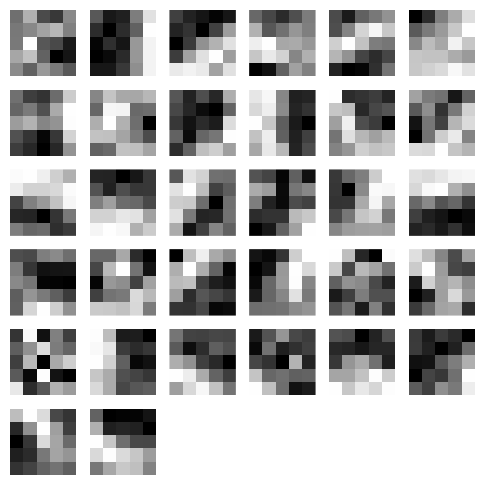

In [19]:
visualize.plot_conv_weights(net1.layers_['conv2d1'])

In [20]:
dense_layer = layers.get_output(net1.layers_['dense'], deterministic=True)
output_layer = layers.get_output(net1.layers_['output'], deterministic=True)
input_var = net1.layers_['input'].input_var

f_output = theano.function([input_var], output_layer)
f_dense = theano.function([input_var], dense_layer)

In [22]:
instance = X_test[0][None, :, :]
%timeit -n 500 f_output(instance)

500 loops, best of 3: 378 µs per loop


<Container object of 10 artists>

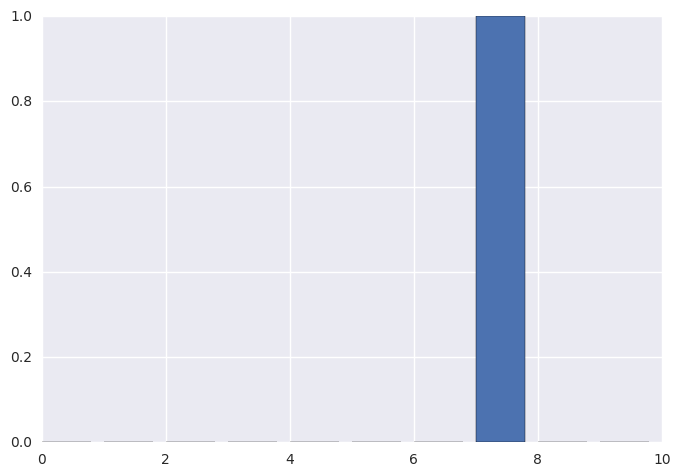

In [23]:
pred = f_output(instance)
N = pred.shape[1]
plt.bar(range(N), pred.ravel())

<Container object of 256 artists>

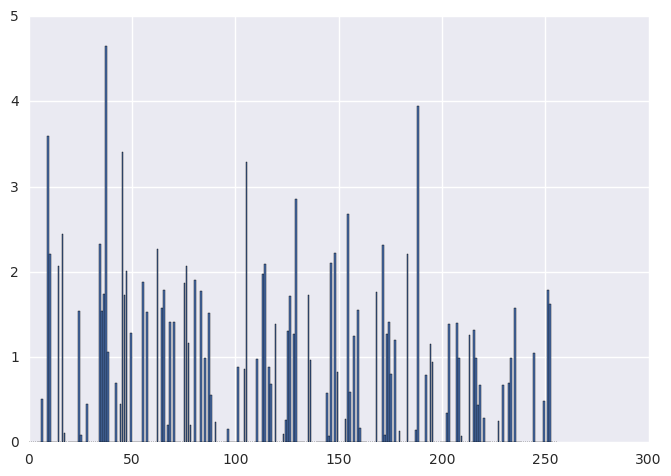

In [24]:
pred = f_dense(instance)
N = pred.shape[1]
plt.bar(range(N), pred.ravel())